# **About this Project:**

This is a Machine learning Capstone project. It is a Linear Regression problem statement.This dataset contains information like price of shares,No. of treds,No. of shares,Deliverable Quantity,Spread High-Low,Spread Close-Open from Jan 2012 to 21st April 2022.(span- 10years)

# Nestle Stock Price Prediction

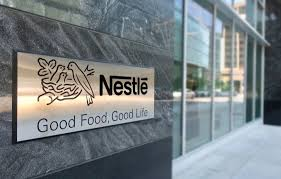

# What is stock?
A stock, also known as equity, is a security that represents the ownership of a fraction of the issuing corporation. Units of stock are called "shares" which entitles the owner to a proportion of the corporation's assets and profits equal to how much stock they own.

# What is stock price prediction?
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

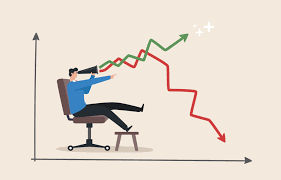

# Goal of project:

Before Investing into any company an investor should study Historical stock Prices of that company , analyze the Opening-closing and High/Low Prices for better understanding of the performance of that company in share markets. Here we are predicting the Closing Price of Nestle Shares with the available Independent Features.

# Key Attribute of Data set:

**Date:** It shows the Date of that day and in this Data set it is uniquely define

**Open Price:** The opening price is the price from the first transaction of a                 business day.

**High Price:** the highest price at which a stock traded during the course of the             trading day and is typically higher than the closing or equal to               the opening.

**Low Price:** the lowest price that a stock trades in that day.

**Close Price:** The closing price is the last price anyone paid for a share of                  that stock during the business hours of the exchange where the                  stock trades.

**WAP:** Weighted Average Price Of The Day.

**No.of Shares:** tells us how many shares of a company are currently owned by investors.

**No. of Trades:** the total number of shares or contracts exchanged between buyers and sellers of a security during trading hours on a given day.

**Total Turnover (Rs.):** (it's multiplication of WAP and No.of shares in a day)Total Stock turnover is considered to be a measure of sales performance

**Deliverable Quantity:** Deliverable quantity is the total number of shares that were marked for delivery on a certain date.

**% Deli. Qty to Traded Qty :** persentage of Deliverable Quantity's value

**Spread High-Low:** the difference between the highest price that a buyer is willing to pay for an asset and the lowest price that a seller is willing to accept.

**Spread Close-Open:** the difference between the close price that a buyer is willing to pay for an asset and the open price that a seller is willing to accept.

# Import Neccesary Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm

# Data Preparation

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
# store the data in 'df_compensation'
df_nestle=pd.read_csv("nestle.csv")

# display first five observations using head()
df_nestle.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


In [3]:
# use 'shape' to check the dimension of data
df_nestle.shape

(2553, 13)

**Interpretation:** The data has 2553 observations and 13 columns.

In [4]:
# use 'info()' to understand the dataset and it also tells that null value are present or not 
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [5]:
df_nestle.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,47619226.422248,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,85028877.597759,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,172142.000000,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,11721329.000000,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,22220739.000000,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,49384650.000000,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2155655355.000000,152993.000000,98.930000,1950.000000,1523.300000


In [6]:
# here we drop null values
df_nestle.dropna(inplace=True)

In [7]:
# check null values
df_nestle.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [8]:
df_nestle.head(2000)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000
5,12-April-2022,18339.000000,18497.000000,18216.300000,18430.000000,18390.222000,2000,537,36780444.000000,1412.000000,70.600000,280.700000,91.000000
6,11-April-2022,18499.000000,18518.350000,18225.000000,18422.700000,18385.862360,712,364,13090734.000000,305.000000,42.840000,293.350000,-76.300000
7,8-April-2022,18180.000000,18500.000000,18101.000000,18431.100000,18361.677527,1197,514,21978928.000000,534.000000,44.610000,399.000000,251.100000
8,7-April-2022,18198.600000,18245.950000,17986.750000,18175.550000,18131.799564,918,357,16644992.000000,240.000000,26.140000,259.200000,-23.050000
9,6-April-2022,17900.000000,18255.350000,17871.200000,18207.600000,18096.243542,813,397,14712246.000000,341.000000,41.940000,384.150000,307.600000


# EDA

<AxesSubplot:xlabel='Open Price', ylabel='Close Price'>

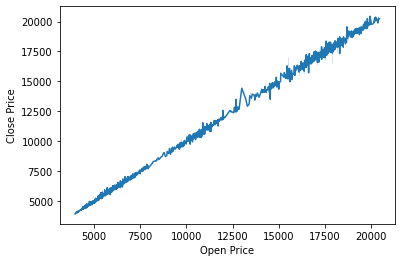

In [13]:
sns.lineplot(x='Open Price',y='Close Price',data=df_nestle)

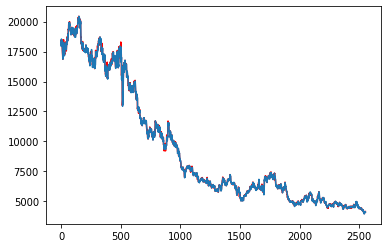

In [19]:
plt.plot('Open Price',data=df_nestle,color='r')
plt.plot('Close Price',data=df_nestle)

 **HERE WE CAN SEE THAT THERE IS NO DIFFERENCE BETWEEN CLOSE PRICE AND OPEN PRICE**

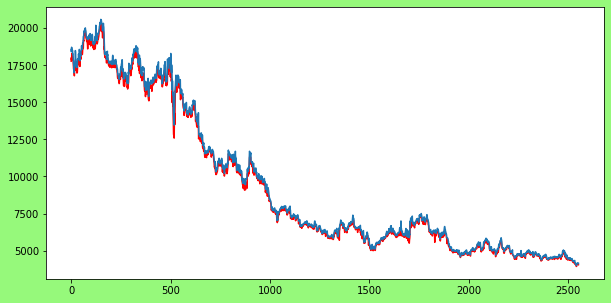

In [26]:
plt.figure(figsize=(10,5),edgecolor='k',facecolor='xkcd:light green')

plt.plot('Low Price',data=df_nestle,color='r')
plt.plot('High Price',data=df_nestle)

**HERE WE CAN SEE THAT THERE IS NO DIFFERENCE BETWEEN LOW PRICE AND HIGH PRICE**

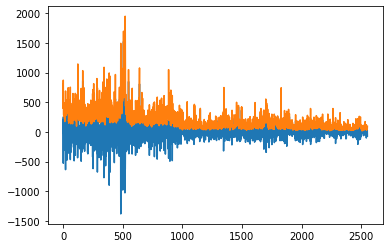

In [24]:
plt.plot('Spread Close-Open',data=df_nestle)
plt.plot('Spread High-Low',data=df_nestle)

In [31]:
df_num=df_nestle.drop(['Date'],axis=1)

In [32]:
df_num.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


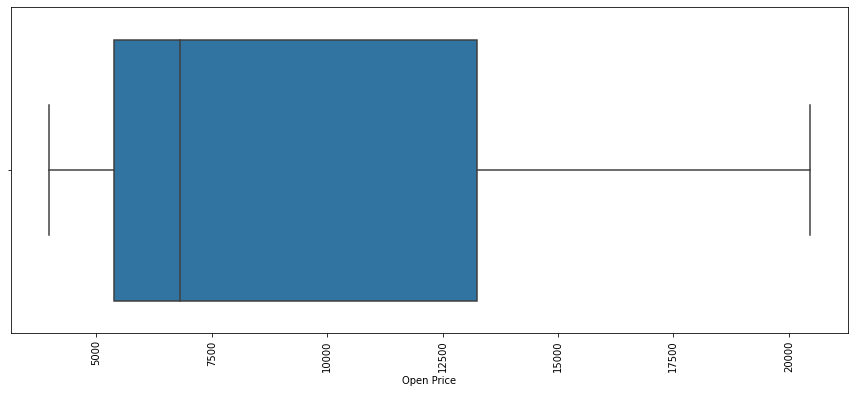

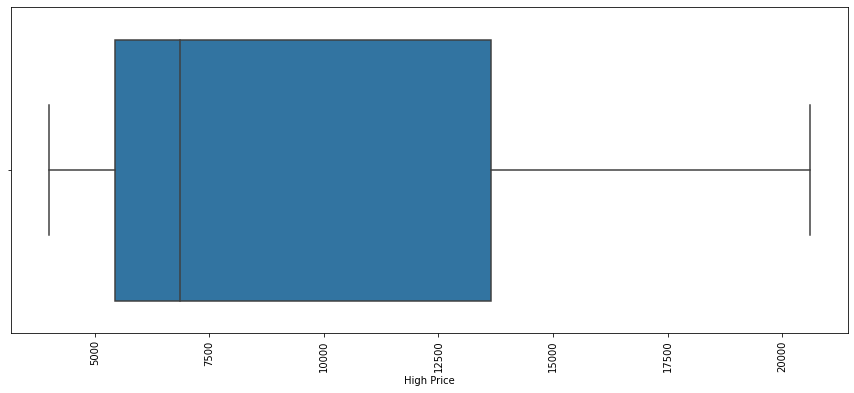

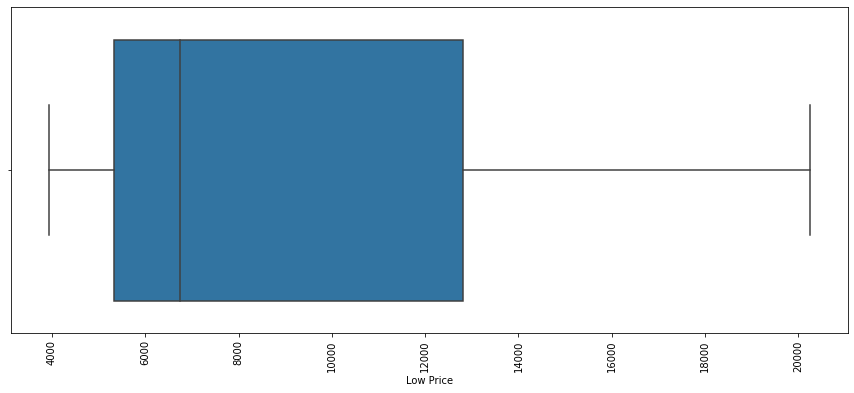

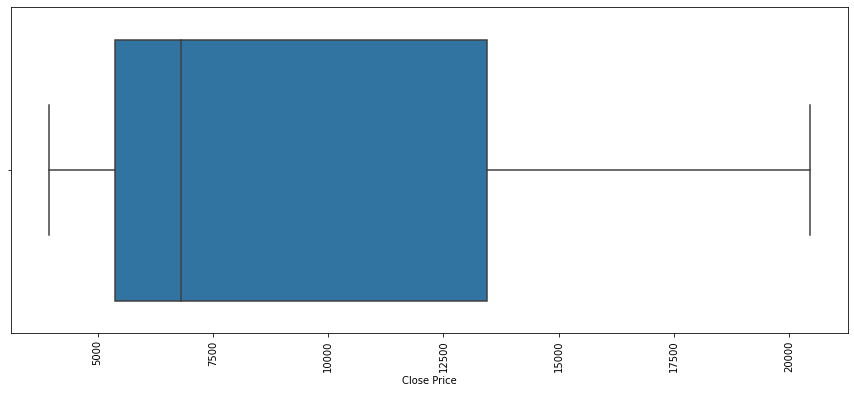

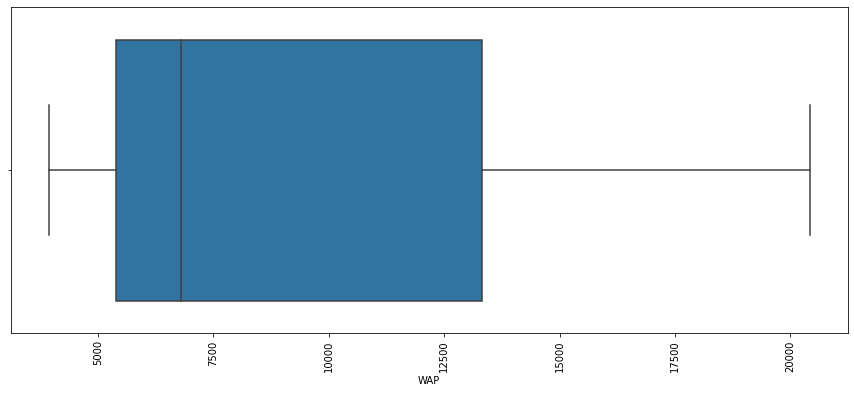

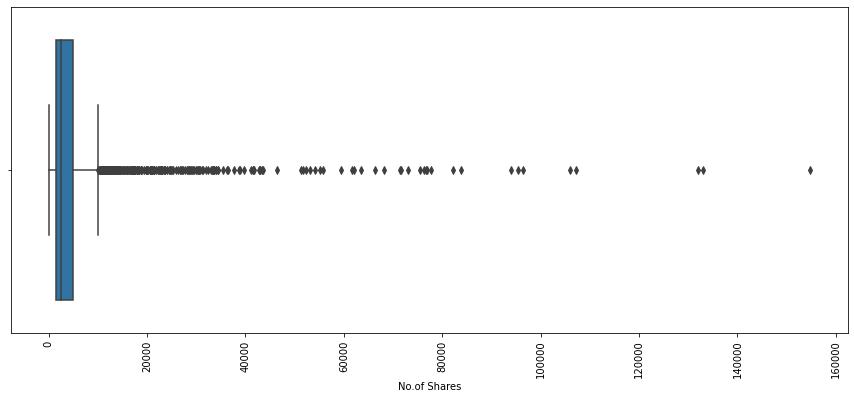

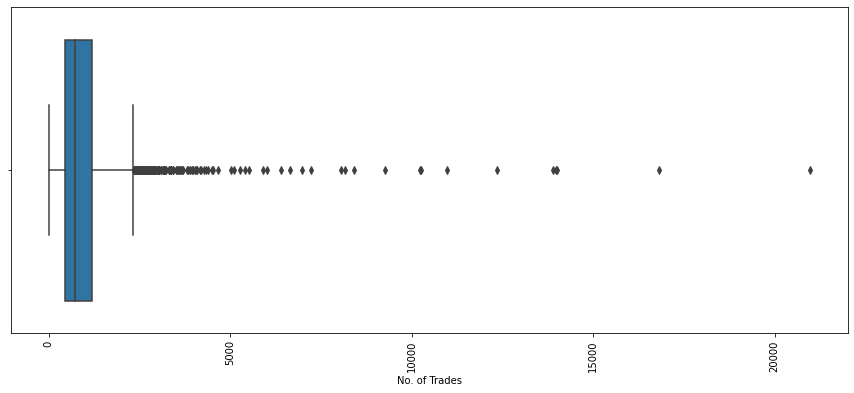

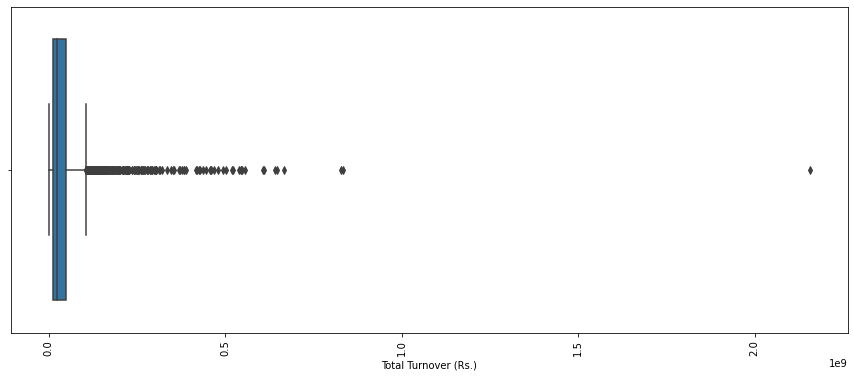

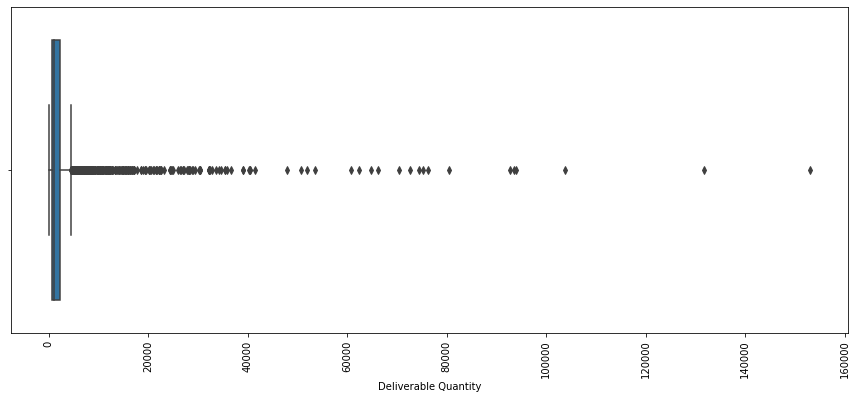

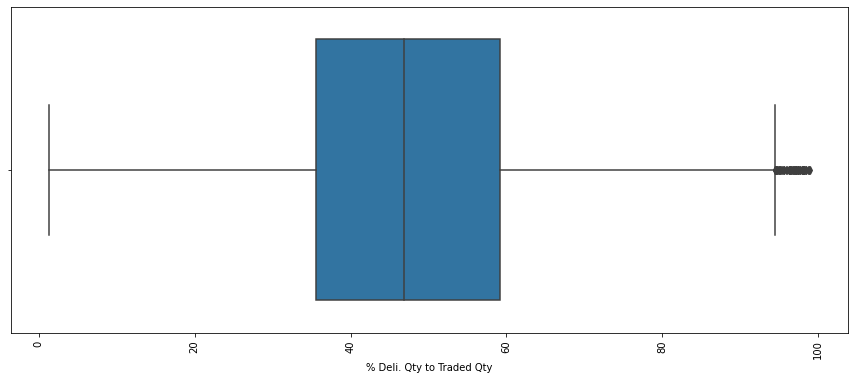

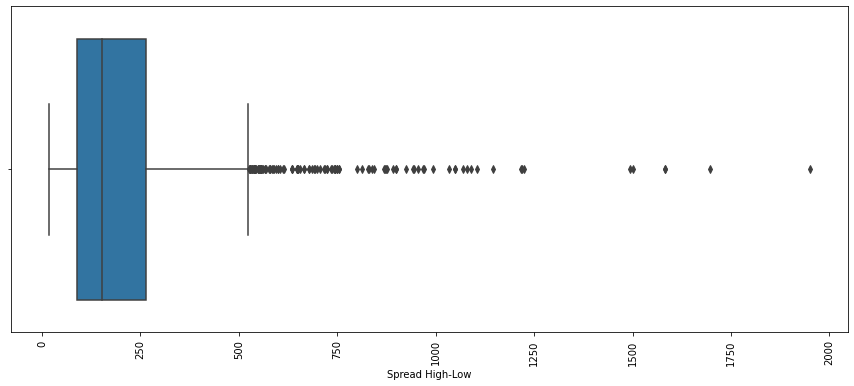

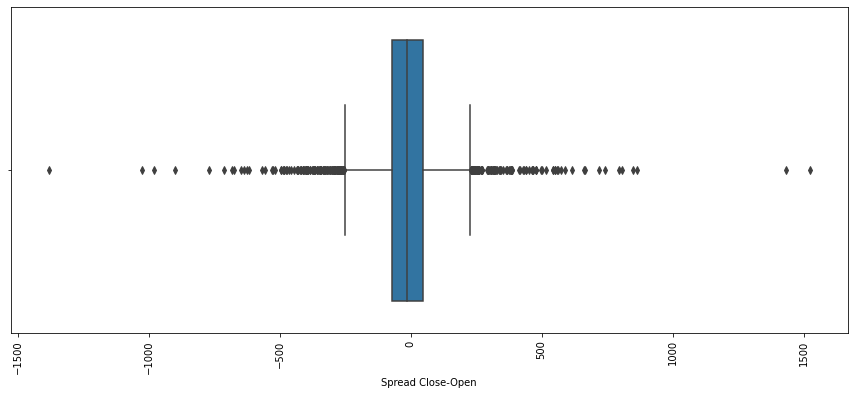

In [34]:
#using numeric data set plot boxplot
for i in df_num.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df_num[i],data=df_num)
    plt.xticks(rotation=90)
    plt.show()

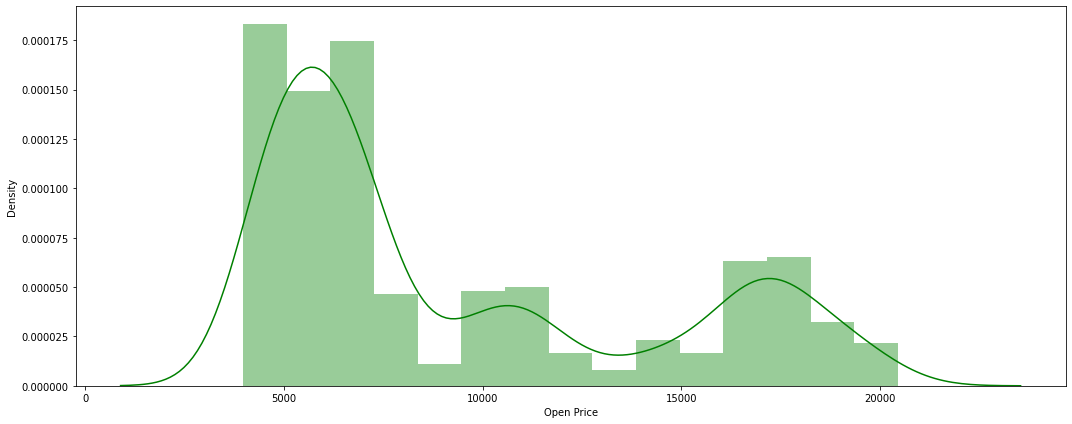

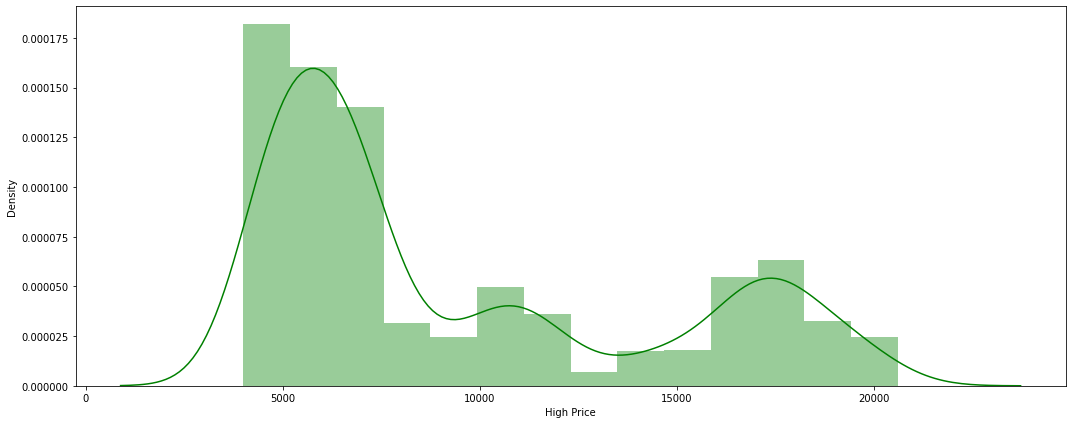

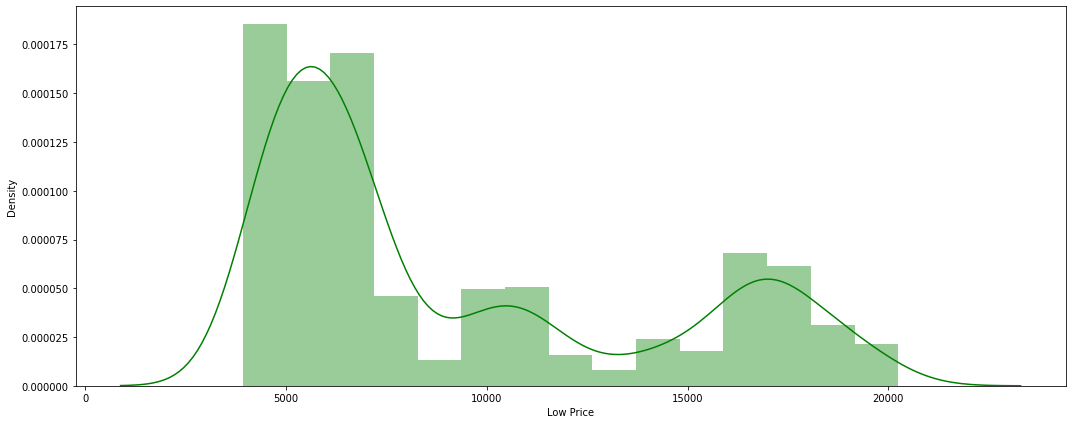

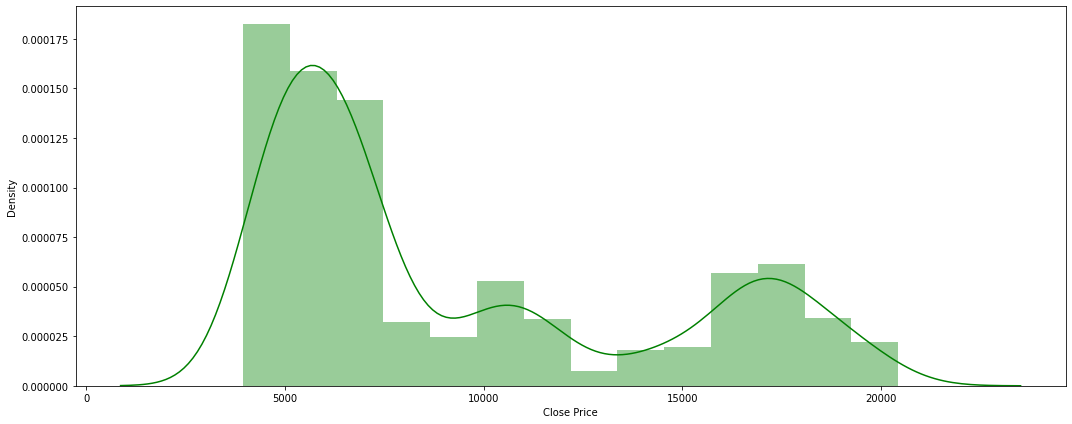

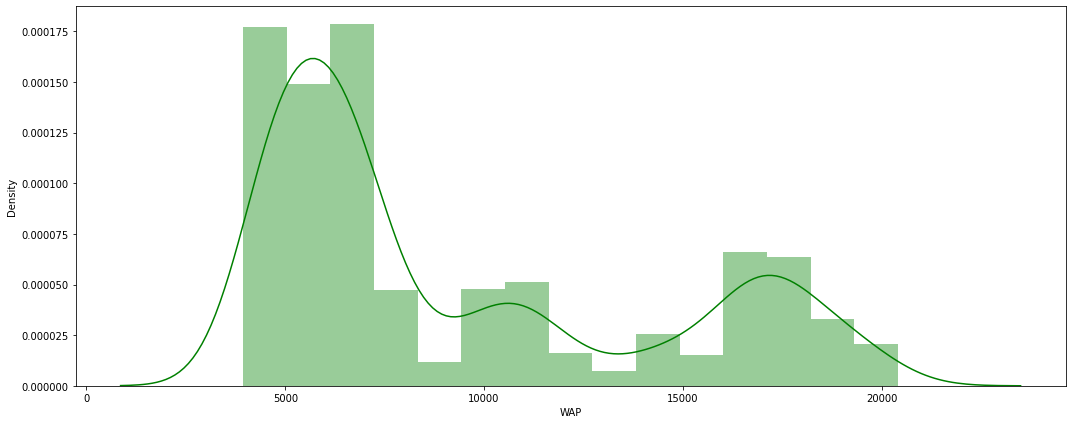

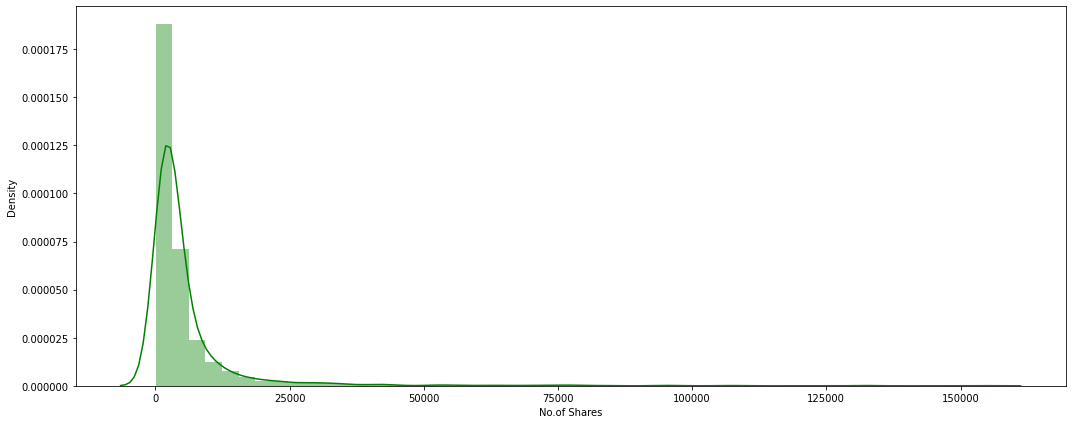

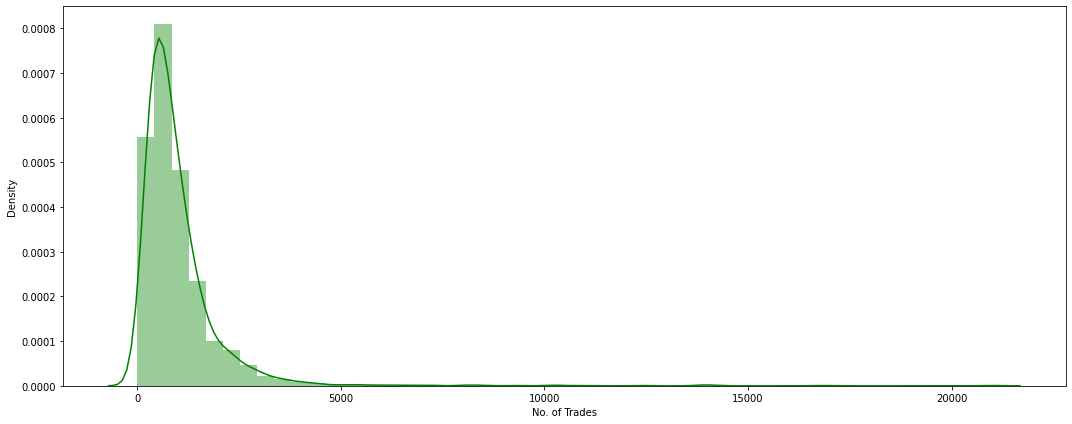

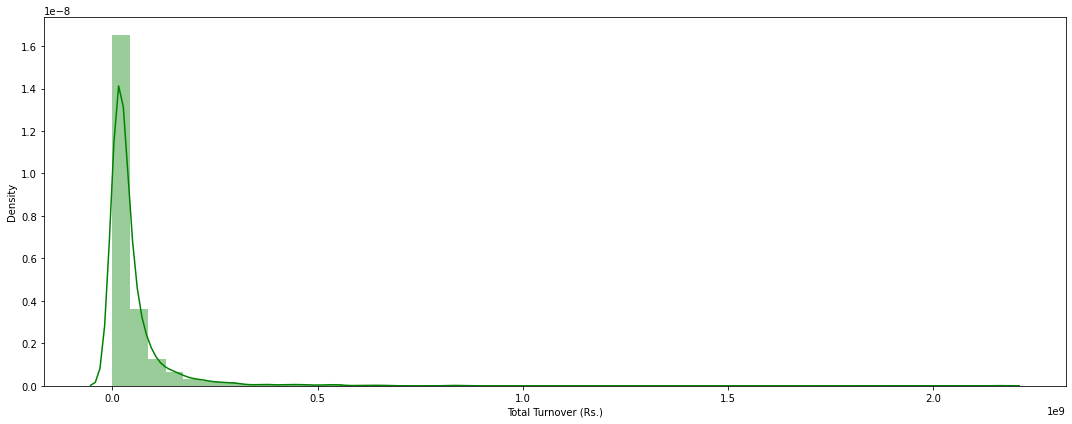

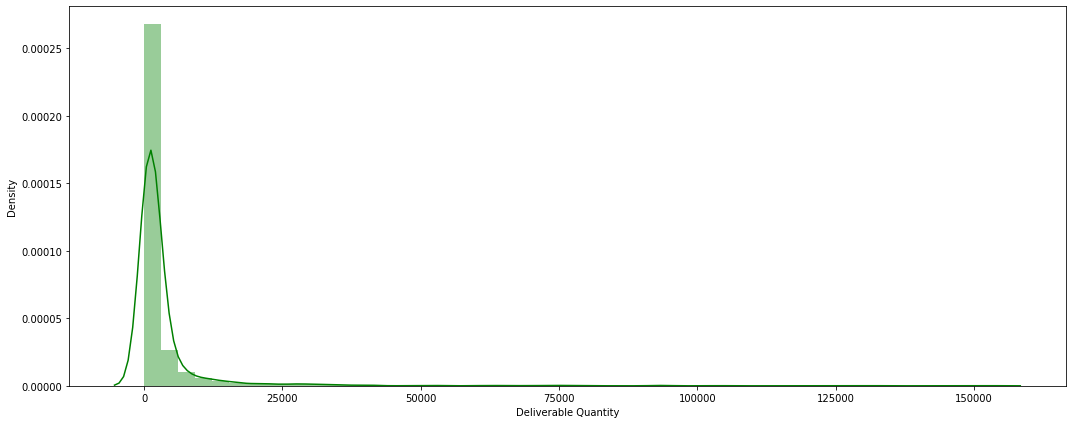

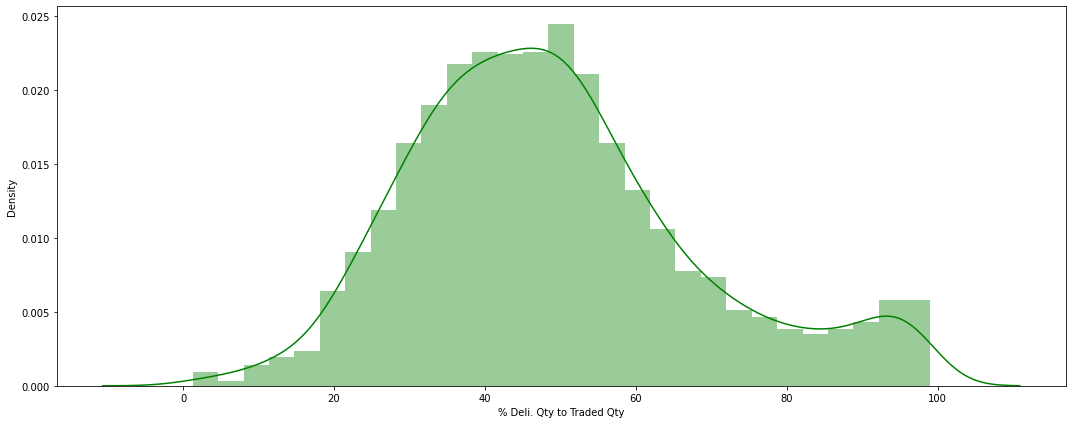

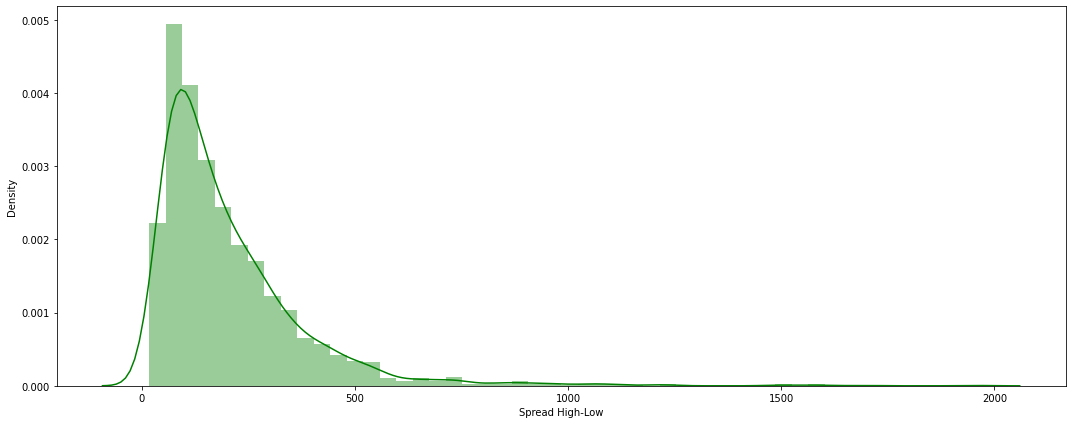

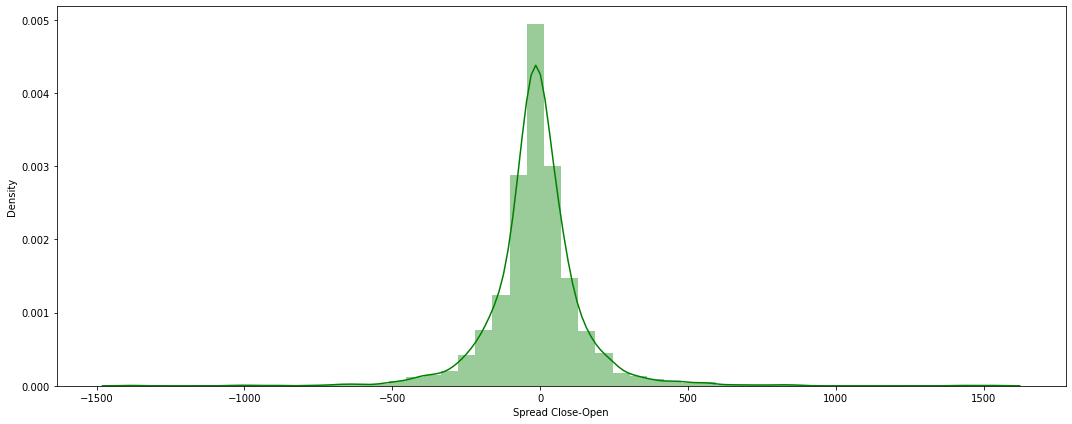

In [35]:
#using numeric data set plot distplot
for i in df_num.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df_num[i],color='g')
    plt.tight_layout()